# <center> t-SNE <center>

High-dimensional data, meaning data that requires more than two or three dimensions to represent, can be difficult to interpret. One approach to simplification is to assume that the data of interest lie on an embedded non-linear manifold within the higher-dimensional space. If the manifold is of low enough dimension, the data can be visualised in the low-dimensional space.

Many of these non-linear dimensionality reduction methods are related to the linear methods listed below. Non-linear methods can be broadly classified into two groups: those that provide a mapping (either from the high-dimensional space to the low-dimensional embedding or vice versa), and those that just give a visualisation. In the context of machine learning, mapping methods may be viewed as a preliminary feature extraction step, after which pattern recognition algorithms are applied. Typically those that just give a visualisation are based on proximity data – that is, distance measurements.

The algorithm **t-SNE** has been merged in the master of scikit learn recently. It is a nice tool to visualize and understand high-dimensional data. So **t-SNE** is a tool for data visualization. It reduces the dimensionality of data to 2 or 3 dimensions so that it can be plotted easily. Local similarities are preserved by this embedding.

---
t-SNE converts distances between data in the original space to probabilities. First, we compute conditional probabilites:

$ p_{j|i} = \frac{\exp{(-d(\boldsymbol{x}_i, \boldsymbol{x}_j) / (2 \sigma_i^2)})}{\sum_{i \neq k} \exp{(-d(\boldsymbol{x}_i, \boldsymbol{x}_k) / (2 \sigma_i^2)})}, \quad p_{i|i} = 0$

which will be used to generate joint probabilities:

$ p_{ij} = \frac{p_{j|i} + p_{i|j}}{2N} $

The $σ_i$ will be determined automatically. This procedure can be influenced by setting the perplexity of the algorithm.
A heavy-tailed distribution will be used to measure the similarities in the embedded space:

$ q_{ij} = \frac{(1 + ||\boldsymbol{y}_i - \boldsymbol{y}_j)||^2)^{-1}}{\sum_{k \neq l} (1 + ||\boldsymbol{y}_k - \boldsymbol{y}_l)||^2)^{-1}} $

and then we minimize the Kullback-Leibler divergence:

$ KL(P|Q) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}} $

between both distributions with gradient descent (and some tricks). Note that the cost function is not convex and multiple runs might yield different results.

More information can be found in these resources and in the documentation of t-SNE:
Website (Implementations, FAQ, etc.): https://lvdmaaten.github.io/tsne/
Original paper: http://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf

In [1]:
from sklearn.manifold import TSNE

help(TSNE)

Help on class TSNE in module sklearn.manifold.t_sne:

class TSNE(sklearn.base.BaseEstimator)
 |  t-distributed Stochastic Neighbor Embedding.
 |  
 |  t-SNE [1] is a tool to visualize high-dimensional data. It converts
 |  similarities between data points to joint probabilities and tries
 |  to minimize the Kullback-Leibler divergence between the joint
 |  probabilities of the low-dimensional embedding and the
 |  high-dimensional data. t-SNE has a cost function that is not convex,
 |  i.e. with different initializations we can get different results.
 |  
 |  It is highly recommended to use another dimensionality reduction
 |  method (e.g. PCA for dense data or TruncatedSVD for sparse data)
 |  to reduce the number of dimensions to a reasonable amount (e.g. 50)
 |  if the number of features is very high. This will suppress some
 |  noise and speed up the computation of pairwise distances between
 |  samples. For more tips see Laurens van der Maaten's FAQ [2].
 |  
 |  Read more in the 

In [2]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
X_tsne = TSNE(learning_rate=100).fit_transform(iris.data)
X_pca = PCA().fit_transform(iris.data)

t-SNE can help us to decide whether classes are separable in some linear or nonlinear representation. Here we can see that the 3 classes of the Iris dataset can be separated quite easily. They can even be separated linearly which we can conclude from the low-dimensional embedding of the  PCA.

In [9]:
import matplotlib.pyplot as plt

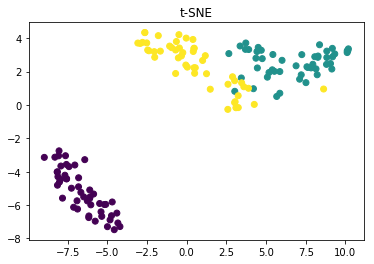

In [12]:
plt.title("t-SNE")
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=iris.target)

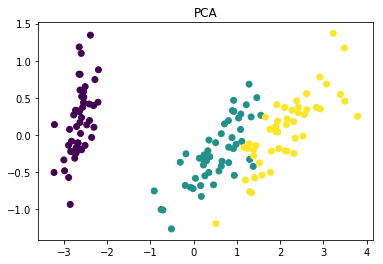

In [13]:
plt.title("PCA")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)

---
## High-dimensional sparse data: the 20 newsgroups dataset

In high-dimensional and nonlinear domains, PCA is not applicable any more and many other manifold learning algorithms do not yield good visualizations either because they try to preserve the global data structure.

In [14]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups = fetch_20newsgroups(subset="train", categories=categories)
vectors = TfidfVectorizer().fit_transform(newsgroups.data)

In [18]:
print(repr(vectors))

<2034x34118 sparse matrix of type '<class 'numpy.float64'>'
	with 323433 stored elements in Compressed Sparse Row format>


For high-dimensional sparse data it is helpful to first reduce the dimensions to 50 dimensions with TruncatedSVD and then perform t-SNE. This will usually improve the visualization.

In [20]:
from sklearn.decomposition import TruncatedSVD

X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(vectors)

In [22]:
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 2034
[t-SNE] Computed conditional probabilities for sample 2000 / 2034
[t-SNE] Computed conditional probabilities for sample 2034 / 2034
[t-SNE] Mean sigma: 0.107856
[t-SNE] Iteration 25: error = 1.6473154, gradient norm = 0.0066868
[t-SNE] Iteration 50: error = 1.5133444, gradient norm = 0.0060588
[t-SNE] Iteration 75: error = 1.1306909, gradient norm = 0.0018136
[t-SNE] Iteration 100: error = 1.0742830, gradient norm = 0.0032033
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.074283
[t-SNE] Iteration 125: error = 0.9836454, gradient norm = 0.0011085
[t-SNE] Iteration 150: error = 0.9585666, gradient norm = 0.0015376
[t-SNE] Iteration 175: error = 0.9528542, gradient norm = 0.0016236
[t-SNE] Iteration 200: error = 0.9507006, gradient norm = 0.0016995
[t-SNE] Iteration 225: error = 0.9507186, gradient norm = 0.0018145
[t-S

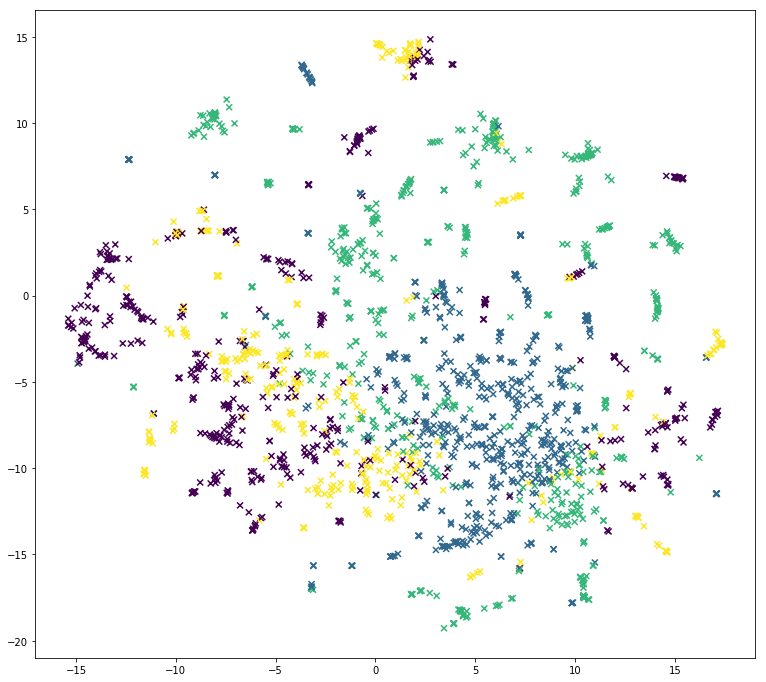

In [25]:
plt.figure(figsize=(10, 10))
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1],
        c=newsgroups.target, marker="x")